# Setting everything up

In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
pd.options.display.max_colwidth = None

pd.options.display.float_format = '${:,.2f}'.format

import string

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
#To Download PDFs
from urllib.parse import urljoin


In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [8]:
#To read images

# !install.packages("jpeg")  ## if necessary

In [9]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)


R[write to console]: Loading required package: RColorBrewer

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate




# Read the csv with all the national anthems
### Source: 
https://www.kaggle.com/datasets/lucasturtle/national-anthems-of-the-world

In [10]:
df_anthem=read_csv('anthems.csv')
df_anthem

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish and one goal, A sacred oath we bestow upon it Proclaiming loyalty for our salvation. From war abstains only he, Who a traitor is born, He who is a true man is not frightened, But dies a warrior to the cause. With weapons in our hands a-brandished, We will defend our fatherland, Our sacred rights weÃ¢â‚¬â„¢ll not relinquish, The foe has no place in our land. For God himself proclaimed The nations of the earth shall wane, And yet will live, will thrive Albania. For you, for you we fight. O Flag, flag, you sacred symbol Upon you we now swear For Albania, our dear fatherland For honour and your glory. Brave man is named and honoured The one who sacrificed himself for the fatherland Forever he will be remembered On earth and under as a saint!"
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has for centuries lived, Is now summoning its sons To the free, independent Armenia. Here is a flag for you, my brother, That I have sewn by hand Over the sleepless nights, And bathed in my tears. Look at it, tricolored, A valuable symbol for us. Let it shine against the enemy. Let you, Armenia, be glorious forever. Death is the same everywhere, A man dies but once, Blessed is the one that dies For the freedom of his nation."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of fields, land of cathedrals, Land of hammers, with a promising future! Home to great daughters and sons, People highly gifted for beautiful arts, Much-praised Austria! Strongly feuded for, fiercely hard-fought for, Thou liest in the middle of the continent Like a strong heart, Since the early days of the ancestors thou hast Borne the burden of a high mission, Much-tried Austria. Bravely towards the new ages See us striding, free, and faithful, Assiduous and full of hope, Unified, let us in jolly choirs Pledge allegiance to thee, Fatherland Much-beloved Austria."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherland of our valorous fathers! We stand at the ready to die for thee! We stand at the ready to shed our blood! All so that we may live blissfully under thy tri-color banner! All so that we may live blissfully under thy tri-color banner! Thousands of martyrs had died for thy cause, Thy sweeping plains had become fields of battle! And our warriors had bravely defended thee! Each one a hero in the storied annals of our land! Thou hast now become our rosegarden, Our hearts we are ever-ready to sacrifice! Thy neverÃ¢â‚¬â€œending love for us Hast earned thou a place in our hearts! To uphold thy honor, To keep thy flag waving, To uphold thy honor, The young stand at the ready! The glorious Fatherland! The glorious Fatherland! Azerbaijan! Azerbaijan! Azerbaijan! Azerbaijan!"
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholeheartedly devoted to our Motherland. We are faithful friends, growing up Living in a hardworking and independent family. Glory to the blessed name of our land, Glory to the brotherly union of peoples! Our dearly beloved Motherland, May you live long and prosper, Belarus! Together with our brothers, we for centuries Courageously defended our home's threshold. In battles for freedom, and battles for our lot We have won our banners of victory! Glory to the blessed name of our land, Glory to the brotherly union of peoples! Our dearly beloved Motherland, May you live long and prosper, Belarus! Friendship of peoples is the strength of peoples And it is our sacred sunlit path. Proudly we fly in the clear blue skies, The banner of victory, the sunshine's flag!"
...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,"O defenders of the Homeland! Rally around to the glory of our time! The blood surges in our veins, We die for the sake of our land. Let the heavens roar with thunder Let thunderbolts rain with fire. Men and youth of Tunisia, Rise up for her might and glory. No place for t

# For Word Bubble:
## Get the dataset for the most common words in national anthems

In [11]:
from collections import Counter
Counter(" ".join(df_anthem["Anthem"]).split()).most_common(200)

[('the', 1462),
 ('of', 928),
 ('and', 749),
 ('our', 559),
 ('to', 428),
 ('in', 342),
 ('we', 256),
 ('your', 237),
 ('a', 229),
 ('is', 222),
 ('And', 215),
 ('for', 191),
 ('us', 188),
 ('The', 187),
 ('be', 179),
 ('We', 167),
 ('with', 167),
 ('are', 150),
 ('that', 141),
 ('will', 134),
 ('all', 129),
 ('you', 120),
 ('land', 115),
 ('To', 109),
 ('my', 107),
 ('Our', 102),
 ('its', 102),
 ('Let', 99),
 ('For', 95),
 ('In', 94),
 ('as', 90),
 ('God', 89),
 ('shall', 84),
 ('O', 84),
 ('from', 84),
 ('May', 82),
 ('on', 81),
 ('this', 80),
 ('it', 76),
 ('by', 74),
 ('thy', 71),
 ('her', 68),
 ('may', 67),
 ('their', 66),
 ('With', 65),
 ('one', 65),
 ('have', 65),
 ('not', 59),
 ('has', 59),
 ('love', 59),
 ('people', 57),
 ('From', 54),
 ('I', 54),
 ('A', 53),
 ('who', 51),
 ('up', 51),
 ('That', 50),
 ('live', 49),
 ('at', 48),
 ('they', 48),
 ('which', 48),
 ('free', 47),
 ('or', 45),
 ('glory', 43),
 ('You', 42),
 ('Of', 41),
 ('nation', 41),
 ('My', 40),
 ('flag', 39),
 ('Y

In [12]:
common_words_dict_list=Counter(" ".join(df_anthem["Anthem"]).split()).most_common(200)
type(common_words_dict_list[0])


tuple

In [13]:
#make a dataframe of common words
df_common_words_dict_list = pd.DataFrame(common_words_dict_list, columns =['word', 'frequency'])
df_common_words_dict_list

,word,frequency
0,the,1462
1,of,928
2,and,749
3,our,559
4,to,428
...,...,...
195,united,16
196,without,16
197,fulfill.,16
198,place,15


In [14]:
#make the words lower case
df_common_words_dict_list['word']=df_common_words_dict_list['word'].apply(lambda x: x.lower().strip())

In [15]:
#get the length of the word
df_common_words_dict_list['word_length'] = df_common_words_dict_list['word'].str.len()
df_common_words_dict_list

,word,frequency,word_length
0,the,1462,3
1,of,928,2
2,and,749,3
3,our,559,3
4,to,428,2
...,...,...,...
195,united,16,6
196,without,16,7
197,fulfill.,16,8
198,place,15,5


In [16]:
# import string
#remove punctuations for one
df_common_words_dict_list.word[158].lower().translate(str.maketrans('', '', string.punctuation))



'canada'

In [17]:
#remove punctuations for all

df_common_words_dict_list['word']=df_common_words_dict_list['word'].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))
df_common_words_dict_list

,word,frequency,word_length
0,the,1462,3
1,of,928,2
2,and,749,3
3,our,559,3
4,to,428,2
...,...,...,...
195,united,16,6
196,without,16,7
197,fulfill,16,8
198,place,15,5


In [18]:
#check the longer words
df_common_words_dict_list.query('word_length>3').head(100)
# df[df.length > 40]
# df.query("length > 40")


,word,frequency,word_length
7,your,237,4
16,with,167,4
18,that,141,4
19,will,134,4
22,land,115,4
...,...,...,...
171,honour,17,6
172,high,17,4
173,thee,17,5
174,glory,17,5


In [19]:
#check the longest common words
df_common_words_dict_list.sort_values(by='word_length', ascending=False).head(30)

,word,frequency,word_length
133,fatherland,21,11
125,happiness,22,9
76,homeland,36,9
134,beautiful,21,9
80,glorious,34,8
74,homeland,37,8
132,country,22,8
188,strength,16,8
99,thousand,28,8
197,fulfill,16,8


In [20]:
#check recurring words
df_common_words_dict_list.sort_values(by='word', ascending=False).head(50)

,word,frequency,word_length
69,your,39,4
7,your,237,4
79,you,34,4
64,you,42,3
21,you,120,3
93,world,29,5
196,without,16,7
16,with,167,4
44,with,65,4
19,will,134,4


In [21]:
#put like words together
# df_common_words_dict_list.sort_values(by='word', ascending=False).head(50)

unique_common_words=df_common_words_dict_list.groupby('word').frequency.sum()
unique_common_words

word
a          282
africa      17
all        167
always      35
an          28
          ... 
with       232
without     16
world       29
you        196
your       276
Name: frequency, Length: 152, dtype: int64

In [22]:
# type(unique_common_words)

#make a dataframe for unique common words
df_unique_common_words=pd.DataFrame(unique_common_words)
df_unique_common_words

,frequency
word,
a,282
africa,17
all,167
always,35
an,28
...,...
with,232
without,16
world,29


In [23]:
# df_unique_common_words['word_length'] = df_unique_common_words['word'].str.len()
#see columns for unique common words dataframe
df_unique_common_words.columns

Index(['frequency'], dtype='object')

In [24]:
#reset the index so I can access the word column as a column rather than an index
df_unique_common_words.reset_index(inplace=True)
df_unique_common_words

,word,frequency
0,a,282
1,africa,17
2,all,167
3,always,35
4,an,28
...,...,...
147,with,232
148,without,16
149,world,29
150,you,196


In [25]:
#find the length of words for the unique common words
df_unique_common_words['word_length'] = df_unique_common_words['word'].str.len()
df_unique_common_words

,word,frequency,word_length
0,a,282,1
1,africa,17,6
2,all,167,3
3,always,35,6
4,an,28,2
...,...,...,...
147,with,232,4
148,without,16,7
149,world,29,5
150,you,196,3


In [26]:
#Check unique long common words
df_unique_common_words.sort_values(by='word_length', ascending=False).head(60)


,word,frequency,word_length
30,fatherland,21,10
45,happiness,22,9
10,beautiful,21,9
21,children,22,8
54,homeland,73,8
114,strength,16,8
39,glorious,34,8
126,thousand,28,8
130,together,18,8
37,fulfill,16,7


In [27]:
#make a dataframe for longer common words 
#here I had presumed that the longer words are more likely to be significant
#However some short words are still significant eg joy
#so will likely continue working with larger dataframe
df_common_long=df_unique_common_words[df_unique_common_words.word_length > 3].sort_values(by='frequency', ascending=False)
df_common_long

,word,frequency,word_length
151,your,276,4
147,with,232,4
65,land,194,4
117,that,191,4
36,from,138,4
...,...,...,...
132,under,16,5
131,true,16,4
44,hand,16,4
98,place,15,5


In [28]:
df_unique_common_words.to_csv("df_unique_common_words.csv")

In [29]:
df_common_long.to_csv("df_common_long.csv")

## Make the word bubble

### Now we have the dataset for the word bubble. 

In [30]:
%%R

df_unique_common_words_r <- read_csv("df_unique_common_words.csv", show_col_types = FALSE) 
df_common_long_r <- read_csv("df_common_long.csv", show_col_types = FALSE) 


New names:
• `` -> `...1`
New names:
• `` -> `...1`


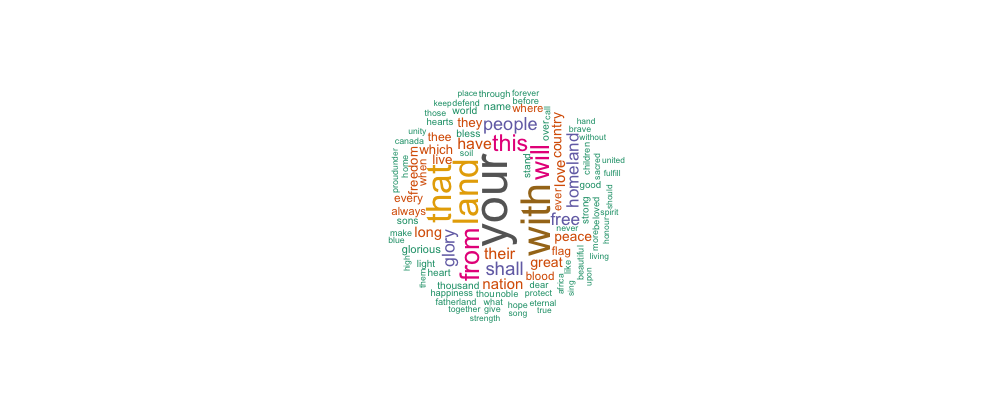

In [31]:
%%R -w 1000 -h 400

set.seed(1234) # for reproducibility 
wordcloud(words = df_common_long_r$word, freq = df_common_long_r$frequency, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))

In [32]:
#The resulting word bubble has words like from, your, with, will which are not significant

# Finding a list of prepositions & pronouns to remove words such as 'your' and 'from' 

#### Sources:
Pronouns: https://www.thefreedictionary.com/List-of-pronouns.htm <br/>
Articles: https://7esl.com/english-articles/<br/>
Common Prepositions: https://www.englishclub.com/grammar/prepositions-list.php<br/>
Conjunctions: https://englishgrammarhere.com/conjunctions/100-conjunction-words-definition-and-example-sentences/ 
Basic verbs: handpicked


In [33]:


%%R

df_minor_words_r <- read_csv("minor_words.csv", show_col_types = FALSE) 


In [34]:
#make a dataframe from minor words csv
df_minor_words = read_csv("minor_words.csv") 
df_minor_words['minor_word']=df_minor_words['minor_word'].str.lower()
df_minor_words

,minor_word
0,am
1,are
2,is
3,was
4,were
...,...
308,where
309,why
310,a
311,an


### I need a way afterwards to remove the above prepositions and pronouns from my dataframe

In [35]:
minor_words_list=df_minor_words.minor_word.tolist()
minor_words_list

['am',
 'are',
 'is',
 'was',
 'were',
 'have',
 'has',
 'be',
 'will',
 'may',
 'might',
 'shall',
 'should',
 'let',
 'a minute later',
 'accordingly',
 'actually',
 'after',
 'after a short time',
 'afterwards',
 'also',
 'and',
 'another',
 'as an example',
 'as a consequence',
 'as a result',
 'as soon as',
 'at last',
 'at lenght',
 'because',
 'because of this',
 'before',
 'besides',
 'briefly',
 'but',
 'consequently',
 'conversely',
 'equally important',
 'finally',
 'first',
 'for example',
 'for instance',
 'for this purpose',
 'for this reason',
 'fourth',
 'from here on',
 'further',
 'furthermore',
 'gradually',
 'hence',
 'however',
 'in addition',
 'in conclusion',
 'in contrast',
 'in fact',
 'in short',
 'in spite of',
 'in spite of this',
 'in summary',
 'in the end',
 'in the meanwhile',
 'in the meantime',
 'in the same manner',
 'in the same way',
 'just as important',
 'least',
 'last',
 'last of all',
 'lastly',
 'later',
 'meanwhile',
 'moreover',
 'neverthele

In [36]:
# # df_overall_jan_maize=df_overall_jan_food.query("commodity_name.isin(['Maize Flour - Sifted', 'Maize Grain - Loose','Fortified Maize flour','Loose Maize Grain'])")

# df_minor_common_rough=df_unique_common_words.query("word.isin(minor_words_list)")
# df_minor_common_rough

In [37]:
print(df_unique_common_words['word'].isin(df_minor_words['minor_word']))

# df_minor_common_rough=df_unique_common_words.query("word.isin(minor_words_list)")
# df_minor_common_rough

0       True
1      False
2       True
3      False
4       True
       ...  
147     True
148     True
149    False
150     True
151     True
Name: word, Length: 152, dtype: bool


In [38]:
print(df_unique_common_words['word'].isin(df_minor_words['minor_word']))


0       True
1      False
2       True
3      False
4       True
       ...  
147     True
148     True
149    False
150     True
151     True
Name: word, Length: 152, dtype: bool


In [39]:
df_unique_common_words[df_unique_common_words['word'].isin(df_minor_words['minor_word'])]


,word,frequency,word_length
0,a,282,1
2,all,167,3
4,an,28,2
5,and,964,3
6,are,150,3
...,...,...,...
146,will,134,4
147,with,232,4
148,without,16,7
150,you,196,3


In [40]:


df_minus_minor_words=df_unique_common_words[~df_unique_common_words['word'].isin(df_minor_words['minor_word'])]
df_minus_minor_words

,word,frequency,word_length
1,africa,17,6
3,always,35,6
10,beautiful,21,9
12,beloved,23,7
13,bless,29,5
...,...,...,...
131,true,16,4
133,united,16,6
134,unity,17,5
138,war,16,3


In [41]:
df_minus_minor_words.to_csv("df_minus_minor_words.csv")

# Making a word bubble with the common words without the minor words

In [42]:
%%R

df_minus_minor_words_r <- read_csv("df_minus_minor_words.csv", show_col_types = FALSE) 


New names:
• `` -> `...1`


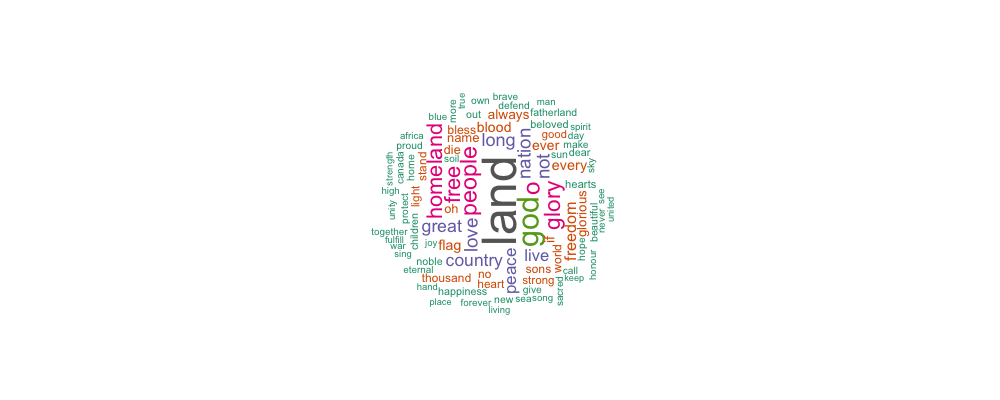

In [43]:
%%R -w 1000 -h 400

set.seed(1234) # for reproducibility 
wordcloud(words = df_minus_minor_words_r$word, freq = df_minus_minor_words_r$frequency, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))


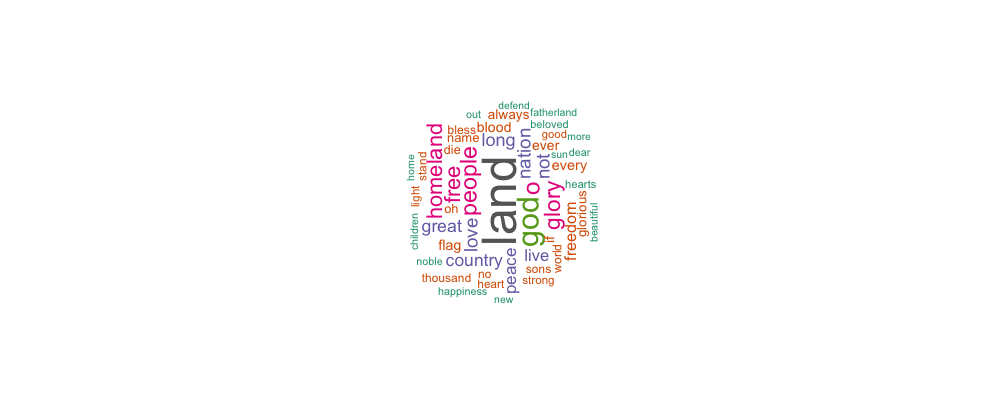

In [44]:
%%R -w 1000 -h 400

set.seed(1234) # for reproducibility 
wordcloud(words = df_minus_minor_words_r$word, freq = df_minus_minor_words_r$frequency, min.freq = 1,
          max.words=50, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))




In [45]:
#probably should change the above to exclude if, so etc, maybe conjunctions list

Saving 13.9 x 5.56 in image


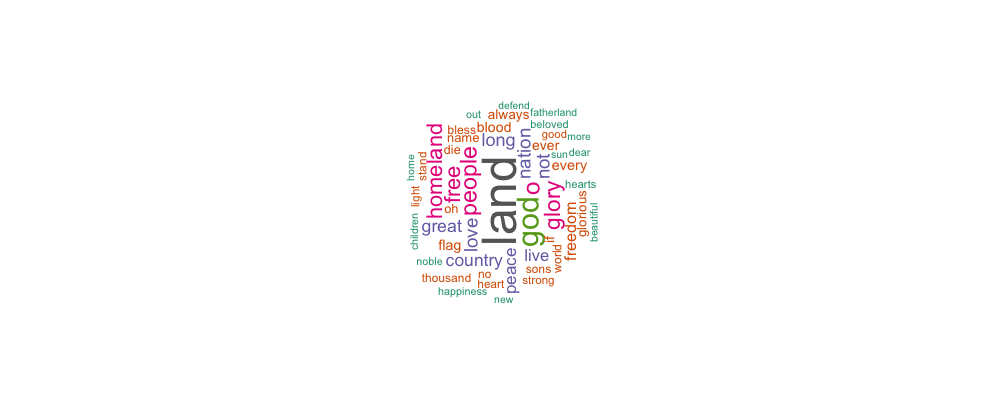

In [53]:
%%R -w 1000 -h 400

set.seed(1234) # for reproducibility 
wordcloud(words = df_minus_minor_words_r$word, freq = df_minus_minor_words_r$frequency, min.freq = 1,
          max.words=50, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))

ggsave("anthemcloud.png")

Saving 13.9 x 5.56 in image


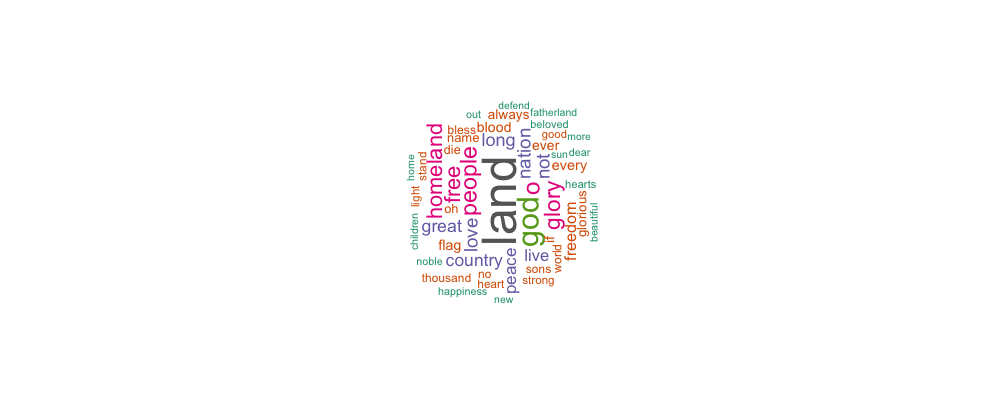

In [56]:
%%R -w 1000 -h 400

set.seed(1234) # for reproducibility 
wordcloud(words = df_minus_minor_words_r$word, freq = df_minus_minor_words_r$frequency, min.freq = 1,
          max.words=50, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Dark2"))
ggsave("anthemcloud.svg")

